In [388]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support


In [389]:
df = pd.read_csv('full_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [390]:
df.groupby('stroke').count()
#only about 5% of patients have had a stroke


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,
0,4733,4733,4733,4733,4733,4733,4733,4733,4733,4733
1,248,248,248,248,248,248,248,248,248,248


In [391]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [392]:
# remove the two outliers
strokes = df[df['stroke'] == 1]
strokes = strokes[strokes['age'] >20]
nonstrokes = df[df['stroke'] == 0]
nonstrokes = nonstrokes[nonstrokes['avg_glucose_level'] < 175]
df = pd.concat([strokes, nonstrokes], ignore_index=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4475,Male,58.0,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4476,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4477,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4478,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


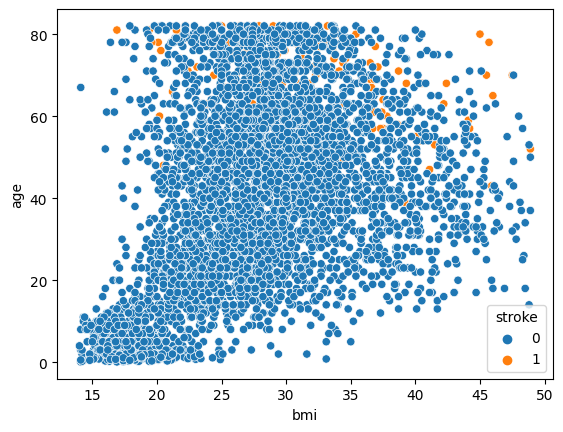

In [403]:
strokes = df[df['stroke'] == 1]
nonstrokes = df[df['stroke']==0]
sns.scatterplot(df, x='bmi', y='age', hue='stroke')
# plt.title('Observed baseflow vs Time')
# plt.ylim(-100, 800)
plt.show()

<Axes: ylabel='age'>

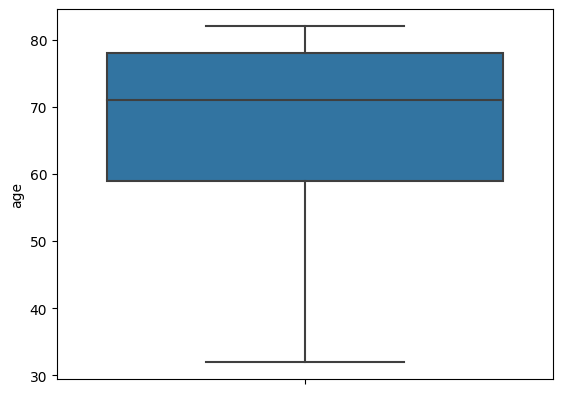

In [394]:
sns.boxplot(strokes, y='age' )

In [395]:
features = ['age','hypertension','bmi','avg_glucose_level' ,'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
df = pd.get_dummies(df, columns=['smoking_status'], drop_first=True)
X = df[features]
Y = df.stroke
features = X.columns
X

,age,hypertension,bmi,avg_glucose_level,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,36.6,228.69,1,0,0
1,80.0,0,32.5,105.92,0,1,0
2,49.0,0,34.4,171.23,0,0,1
3,79.0,1,24.0,174.12,0,1,0
4,81.0,0,29.0,186.21,1,0,0
...,...,...,...,...,...,...,...
4475,58.0,0,30.2,84.94,0,1,0
4476,41.0,0,29.8,70.15,1,0,0
4477,45.0,1,31.8,95.02,0,0,1
4478,40.0,0,30.0,83.94,0,0,1


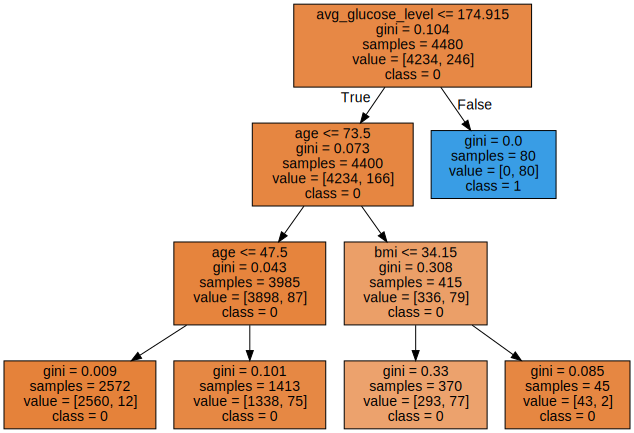

Sample patient 2400 to test on. Tree classified as [0]


/home/carson2stoker/.local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


gender                              Female
age                                   13.0
hypertension                             0
heart_disease                            0
ever_married                            No
work_type                         children
Residence_type                       Urban
avg_glucose_level                    75.78
bmi                                   23.6
stroke                                   0
smoking_status_formerly smoked           0
smoking_status_never smoked              0
smoking_status_smokes                    0
Name: 2400, dtype: object

In [396]:

# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, Y)

# # # # create a Graphviz file
# # # with open("heart.dot", 'w') as f:
# # #     f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=features,
                                    class_names=['0', '1'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

# Get a random sample to see how it does
n = df.shape[0]
i = random.randint(0, n)
# i = 254 # an interesting case
sample = df.iloc[i]
print('Sample patient {} to test on. Tree classified as {}'.format(i, treeclf.predict([sample[features]])))
display(sample)

In [397]:
y_pred = treeclf.predict(X)
p,r,f,s = precision_recall_fscore_support(Y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.96227273 1.        ]'

'recall = [1.         0.32520325]'

'f-score = [0.98077369 0.49079755]'

In [398]:
pd.DataFrame({'feature':features, 'importance':treeclf.feature_importances_})

,feature,importance
0,age,0.147881
1,hypertension,0.000000
2,bmi,0.012403
3,avg_glucose_level,0.839716
4,smoking_status_formerly smoked,0.000000
5,smoking_status_never smoked,0.000000
6,smoking_status_smokes,0.000000


In [404]:
# now try only age, glucose, and bmi
features = ['age','avg_glucose_level', 'bmi']
X = df[features]
Y = df.stroke
features = X.columns
X

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0
...,...,...,...
4475,58.0,84.94,30.2
4476,41.0,70.15,29.8
4477,45.0,95.02,31.8
4478,40.0,83.94,30.0


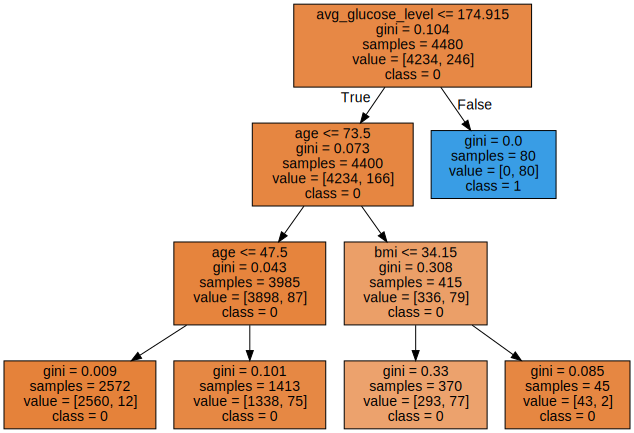

Sample patient 1741 to test on. Tree classified as [0]


/home/carson2stoker/.local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


gender                               Male
age                                  72.0
hypertension                            0
heart_disease                           0
ever_married                          Yes
work_type                         Private
Residence_type                      Urban
avg_glucose_level                   81.05
bmi                                  30.3
stroke                                  0
smoking_status_formerly smoked          0
smoking_status_never smoked             0
smoking_status_smokes                   0
Name: 1741, dtype: object

In [405]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, Y)
graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=features,
                                    class_names=['0', '1'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

n = df.shape[0]
i = random.randint(0, n)
sample = df.iloc[i]
print('Sample patient {} to test on. Tree classified as {}'.format(i, treeclf.predict([sample[features]])))
display(sample)

In [406]:
# bc feature importance of all others were 0, the tree was the same
y_pred = treeclf.predict(X)
p,r,f,s = precision_recall_fscore_support(Y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.96227273 1.        ]'

'recall = [1.         0.32520325]'

'f-score = [0.98077369 0.49079755]'

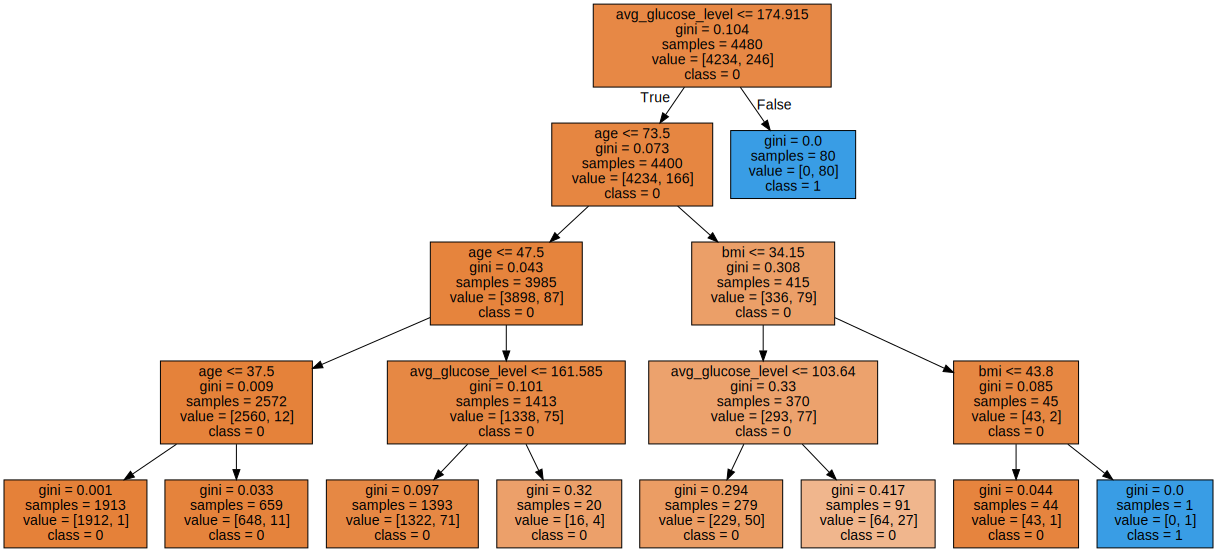

Sample patient 1582 to test on. Tree classified as [0]


/home/carson2stoker/.local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


gender                                   Female
age                                        42.0
hypertension                                  0
heart_disease                                 0
ever_married                                Yes
work_type                         Self-employed
Residence_type                            Rural
avg_glucose_level                         79.99
bmi                                        26.3
stroke                                        0
smoking_status_formerly smoked                0
smoking_status_never smoked                   1
smoking_status_smokes                         0
Name: 1582, dtype: object

In [414]:
# try another tree with more depth
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X, Y)
graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=features,
                                    class_names=['0', '1'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

n = df.shape[0]
i = random.randint(0, n)
sample = df.iloc[i]
print('Sample patient {} to test on. Tree classified as {}'.format(i, treeclf.predict([sample[features]])))
display(sample)

In [409]:
y_pred = treeclf.predict(X)
p,r,f,s = precision_recall_fscore_support(Y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.96249148 1.        ]'

'recall = [1.         0.32926829]'

'f-score = [0.98088729 0.49541284]'